In [1]:
import pandas as pd

In [3]:
names1880 = pd.read_csv('input/names/yob1880.txt',names=['name','sex','births'])

In [4]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [5]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [6]:
# data split by year
# so assemble data into single DataFrame and add year field
# use %d string formatter to iterate through the years
# add 'year' column
# append pieces together
# .concat merges by row and do not preserve original row numbers

pieces = []

In [7]:
columns = ['name', 'sex', 'births']

In [8]:
years = range(1880, 2023)

In [11]:
for year in years:
    path = 'input/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    names = pd.concat(pieces, ignore_index=True)


In [16]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [17]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [18]:
total_births.tail()

sex,F,M
year,,
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588
2021,1635800,1743913
2022,1628730,1733166


<Axes: title={'center': 'Total Births by sex and year'}, xlabel='year'>

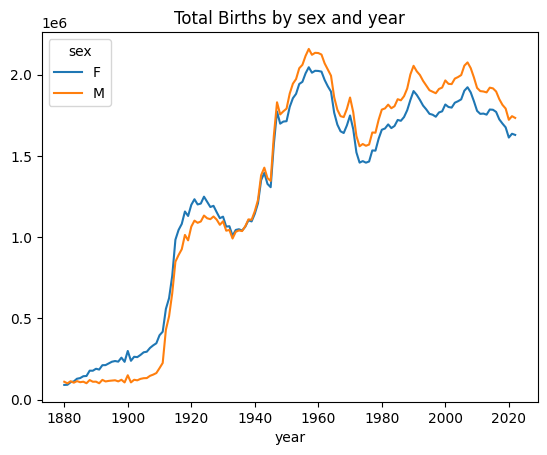

In [19]:
total_births.plot(title='Total Births by sex and year')

In [20]:
def add_prop(group):
    # integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [21]:
names = names.groupby(['year','sex']).apply(add_prop)

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_24500\242111530.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year','sex']).apply(add_prop)


In [22]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000003
2085154,Zydn,M,5,2022,0.000003
2085155,Zylon,M,5,2022,0.000003
2085156,Zymeer,M,5,2022,0.000003


In [23]:
import numpy as np

In [24]:
 np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [25]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

In [26]:
grouped = names.groupby(['year','sex'])

In [55]:
top1000 = names.sort_values(by='births', ascending=False)[:1000]

In [56]:
top1000

,name,sex,births,year,prop
431063,Linda,F,99693,1947,0.056237
441434,Linda,F,96215,1948,0.056668
437167,James,M,94758,1947,0.051795
544672,Michael,M,92785,1957,0.043005
437168,Robert,M,91650,1947,0.050096
...,...,...,...,...,...
1060665,Joseph,M,29880,1989,0.014934
493371,Karen,F,29857,1953,0.015870
1060666,John,M,29854,1989,0.014921
526322,Donna,F,29852,1956,0.014868


In [65]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(ascending=False)[:1000])
    top1000 = pd.concat(pieces, ignore_index=True)

In [66]:
top1000

,name,sex,births,year,prop
0,Wilma,F,5,1880,0.000055
1,Vertie,F,5,1880,0.000055
2,Verona,F,5,1880,0.000055
3,Vannie,F,5,1880,0.000055
4,Ula,F,5,1880,0.000055
...,...,...,...,...,...
285871,Kaynin,M,5,2022,0.000003
285872,Kaymon,M,5,2022,0.000003
285873,Kaymari,M,5,2022,0.000003
285874,Kaylyn,M,5,2022,0.000003


# Analyzing Naming Trends

In [67]:
boys = top1000[top1000.sex == 'M']

In [68]:
girls = top1000[top1000.sex == 'F']

In [69]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [70]:
total_births

name,Aagot,Aalon,Aaran,Aaraon,Aaric,Aarin,Aarne,Aaron,Aaronlee,Aarron,...,Zysean,Zyshaun,Zyshawn,Zyshon,Zytaevius,Zytavion,Zytavious,Zyus,Zyvion,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
subset = total_births[['Wilma','Aarne','Mary','Marilyn']]

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

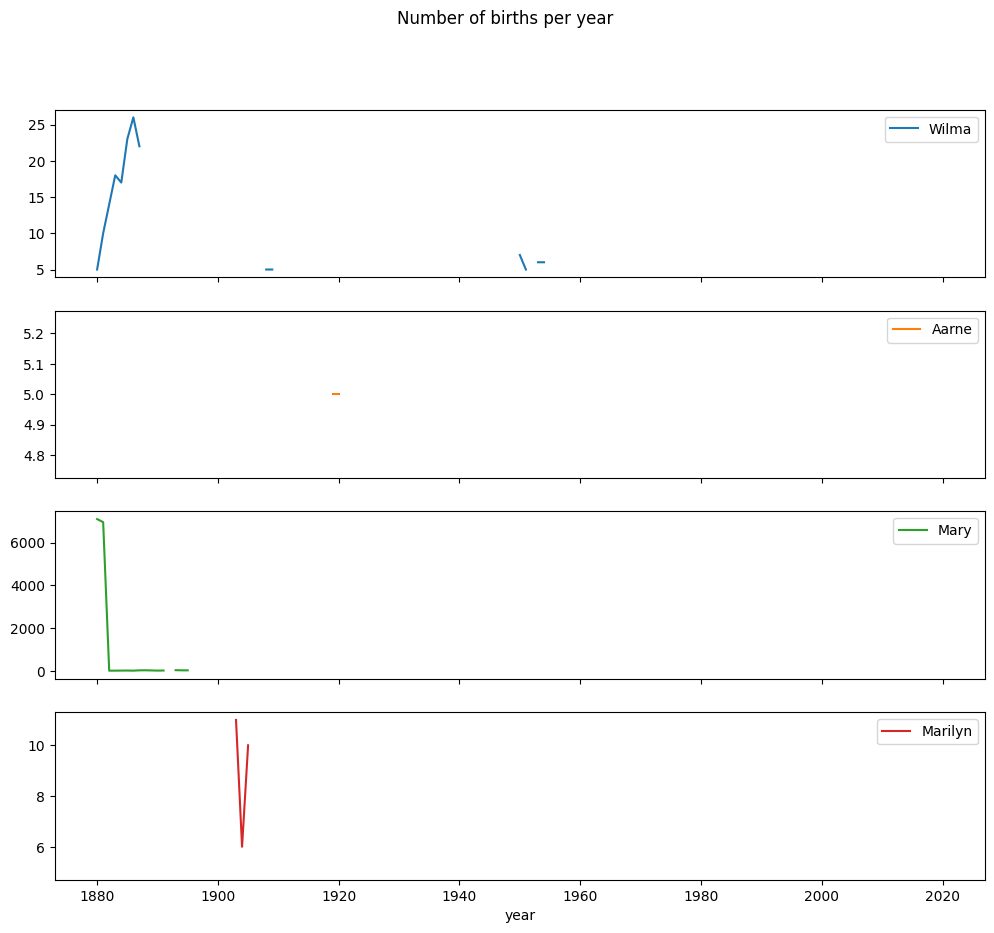

In [72]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [73]:
subsetw = total_births[['Wayne']]

<Axes: title={'center': 'Wayne'}, xlabel='year'>

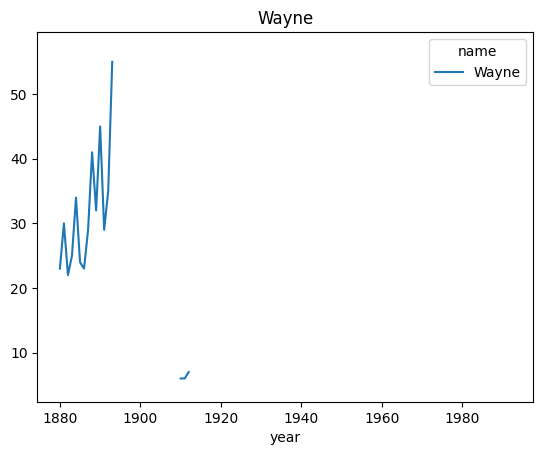

In [74]:
subsetw.plot(title='Wayne')

In [75]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

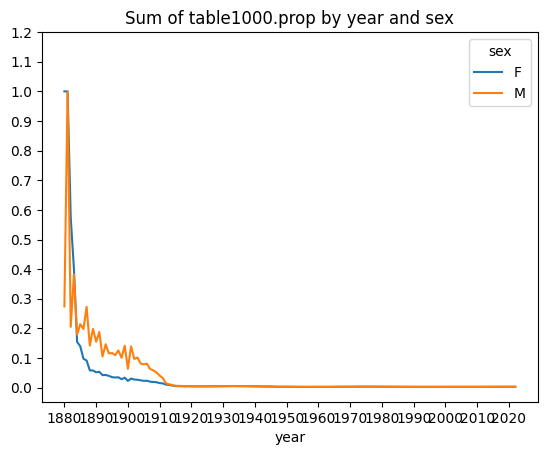

In [76]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2022, 10))

In [77]:
df = boys[boys.year == 2022]

In [78]:
df

,name,sex,births,year,prop
284876,Zymeire,M,5,2022,0.000003
284877,Zymeer,M,5,2022,0.000003
284878,Zylon,M,5,2022,0.000003
284879,Zydn,M,5,2022,0.000003
284880,Zuberi,M,5,2022,0.000003
...,...,...,...,...,...
285871,Kaynin,M,5,2022,0.000003
285872,Kaymon,M,5,2022,0.000003
285873,Kaymari,M,5,2022,0.000003
285874,Kaylyn,M,5,2022,0.000003


In [80]:
prop_cumsum = df.sort_index(ascending=False).prop.cumsum()

In [81]:
prop_cumsum[:10]

285875    0.000003
285874    0.000006
285873    0.000009
285872    0.000012
285871    0.000014
285870    0.000017
285869    0.000020
285868    0.000023
285867    0.000026
285866    0.000029
Name: prop, dtype: float64

In [82]:
prop_cumsum.searchsorted(0.5)

1000

In [83]:
df = boys[boys.year == 1900]

In [84]:
in1900 = df.sort_index(ascending=False).prop.cumsum()

In [85]:
in1900.searchsorted(0.5) + 1

1001

In [87]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [88]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [89]:
diversity.head()

sex,F,M
year,,
1880,38,1001
1881,38,14
1882,289,1001
1883,1001,1001
1884,1001,1001


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

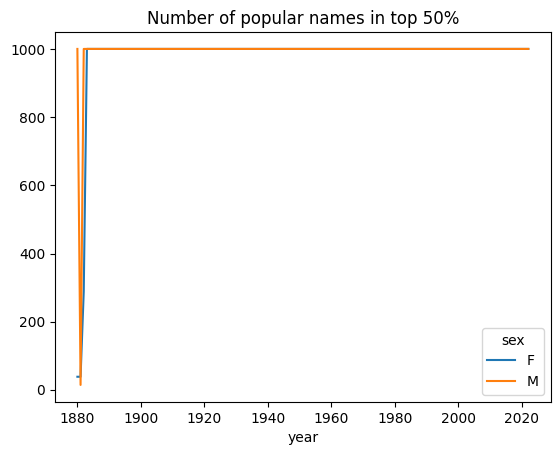

In [90]:
diversity.plot(title="Number of popular names in top 50%")

# The “Last letter” Revolution

In [91]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [92]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [93]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [94]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691323.0  677323.0    977.0    5217.0   28896.0
b                 NaN     694.0     455.0    411.0    3911.0   39304.0
c                 5.0      49.0     958.0    482.0   15458.0   23364.0
d              6751.0    3731.0    2645.0  22112.0  262131.0   44864.0
e            133599.0  435008.0  317005.0  28665.0  178762.0  130348.0

In [95]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022061.0
     2010    1776636.0
M    1910     194209.0
     1960    2132230.0
     2010    1917792.0
dtype: float64

In [96]:
letter_prop = subtable / subtable.sum().astype(float)

In [97]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

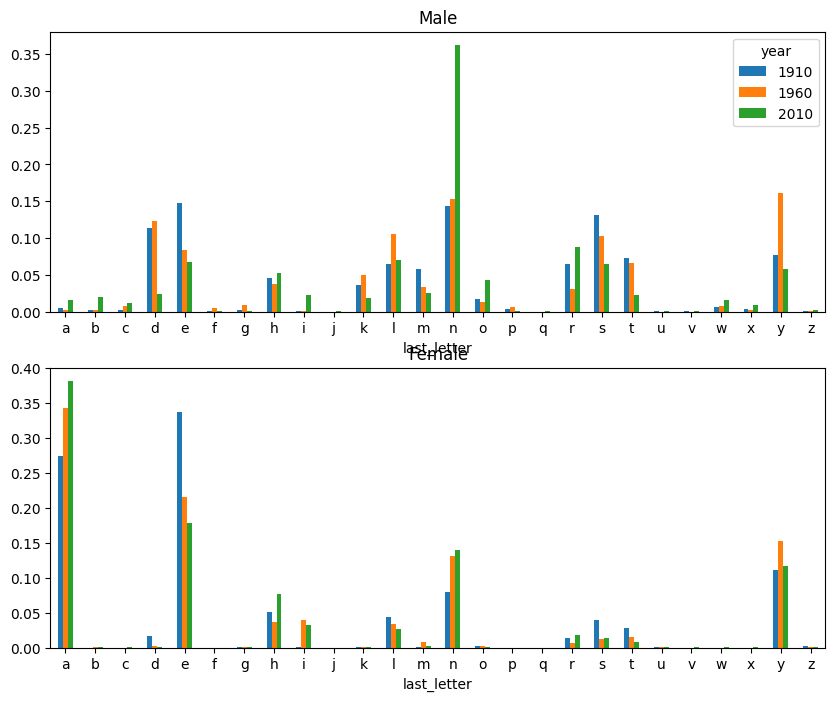

In [98]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
legend=False)

In [99]:
letter_prop = table / table.sum().astype(float)

In [105]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [106]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

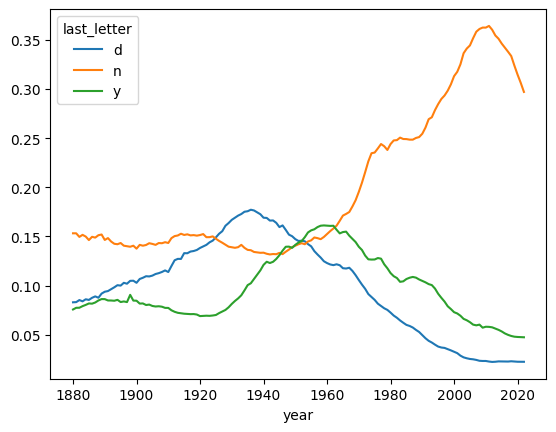

In [107]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [108]:
all_names = top1000.name.unique()

In [109]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [110]:
lesley_like = all_names[mask]

In [111]:
lesley_like

array(['Leslie', 'Lesley', 'Boleslaw', 'Boleslaus', 'Lesly', 'Leslye',
       'Wellesley', 'Leslee', 'Leslyn', 'Lesle', 'Leslieann', 'Lesleyann',
       'Lesleyanne', 'Leslianne', 'Leslea', 'Leslieanne', 'Leslian'],
      dtype=object)

In [112]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [113]:
filtered.groupby('name').births.sum()

name
Boleslaus      20
Boleslaw        5
Lesle          15
Leslea          5
Leslee         71
Lesley        161
Lesleyann      40
Lesleyanne     20
Leslian         5
Leslianne      10
Leslie        983
Leslieann      20
Leslieanne      5
Lesly         113
Leslye         26
Leslyn         40
Wellesley      21
Name: births, dtype: int64

In [114]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [115]:
table = table.div(table.sum(1), axis=0)

In [116]:
table.tail()

sex,F,M
year,,
2008,NaN,1.0
2012,NaN,1.0
2017,1.0,NaN
2018,NaN,1.0
2020,1.0,NaN


<Axes: xlabel='year'>

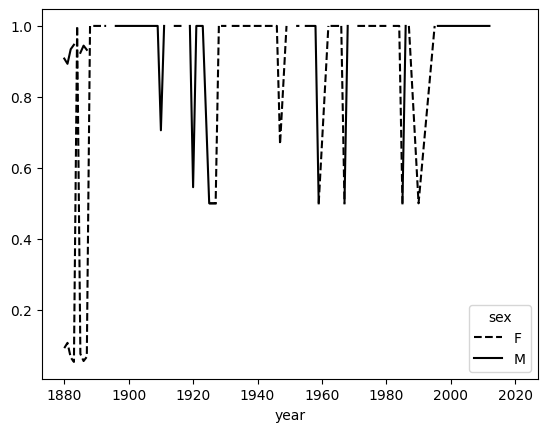

In [117]:
table.plot(style={'M': 'k-', 'F': 'k--'})